In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

In [3]:
df = pd.read_csv('../002/auto-mpg.csv', header=None)

In [4]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [5]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [6]:
features = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [40]:
X=features[['weight','horsepower']]  #독립 변수 X
y=features['mpg']       #종속 변수 Y

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [42]:
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (313, 2)
검증 데이터:  (79, 2)


## 다항식 변환

#### 2차항 적용

In [43]:
poly = PolynomialFeatures(degree=3)

#### X_train 데이터를 2차항으로 변형

In [44]:
X_train_poly=poly.fit_transform(X_train)         

In [45]:
print('기존 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

기존 데이터:  (313, 2)
2차항 변환 데이터:  (313, 10)


In [46]:
X_train

,weight,horsepower
151,2000.0,67.0
383,1965.0,67.0
70,4422.0,190.0
122,2660.0,110.0
212,4380.0,180.0
...,...,...
375,1980.0,74.0
322,2110.0,65.0
15,2833.0,95.0
127,2901.0,100.0


In [47]:
X_train_poly

array([[1.00000000e+00, 2.00000000e+03, 6.70000000e+01, ...,
        2.68000000e+08, 8.97800000e+06, 3.00763000e+05],
       [1.00000000e+00, 1.96500000e+03, 6.70000000e+01, ...,
        2.58702075e+08, 8.82088500e+06, 3.00763000e+05],
       [1.00000000e+00, 4.42200000e+03, 1.90000000e+02, ...,
        3.71527596e+09, 1.59634200e+08, 6.85900000e+06],
       ...,
       [1.00000000e+00, 2.83300000e+03, 9.50000000e+01, ...,
        7.62459455e+08, 2.55678250e+07, 8.57375000e+05],
       [1.00000000e+00, 2.90100000e+03, 1.00000000e+02, ...,
        8.41580100e+08, 2.90100000e+07, 1.00000000e+06],
       [1.00000000e+00, 2.56000000e+03, 9.50000000e+01, ...,
        6.22592000e+08, 2.31040000e+07, 8.57375000e+05]])

### train data를 가지고 모델 학습

In [48]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7189613756311704


#### train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 

In [29]:
y_hat_test = pr.predict(X_test_poly)

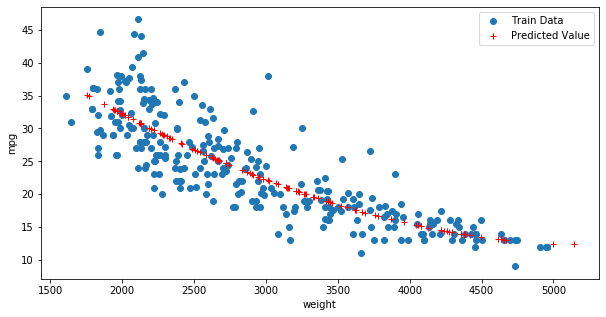

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#### 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 

In [22]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

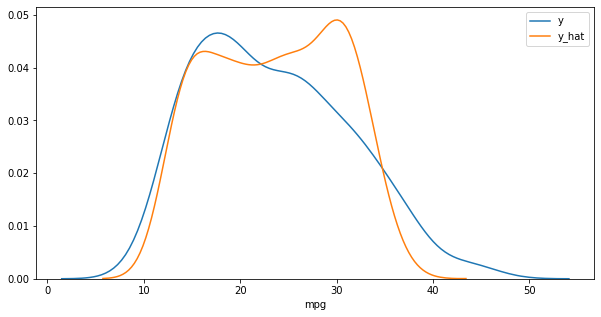

In [23]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()